In [1]:
from math import atan2
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# UTILS

# plotea los puntos y la envoltura convexa
def plot(points, hull=None, last=False):
  plt.figure()
  plt.scatter([x[0] for x in points], [x[1] for x in points])
  if(hull):
    for i in range(1, len(hull)):
      #if(i == len(hull)):
        #i = 0
      plt.plot((hull[i-1][0],hull[i][0]), (hull[i-1][1],hull[i][1]), 'r')
    if(last):
      plt.plot((hull[-1][0],hull[0][0]), (hull[-1][1],hull[0][1]), 'r')
  plt.show()

# para ordenar según su ángulo en radianes
def sort_by_angle(pivot, point):
  return atan2(point[1] - pivot[1], point[0] - pivot[0])

# determinante de P1P2 P1P3
def det(p1, p2, p3):
  return (p2[0]-p1[0])*(p3[1]-p1[1])-(p2[1]-p1[1])*(p3[0]-p1[0])

In [3]:
# leo el archivo y cargo los datos en un array
file = open('test1.txt','r')
points = []
for line in file:
  (x, y) = tuple(line.rstrip('\n').split(' '))
  points.append((int(x), int(y)))
print(points)

[(0, 0), (6, 3), (1, 3), (2, 1), (3, 1), (3, 3), (4, 0), (4, 5), (6, 3)]


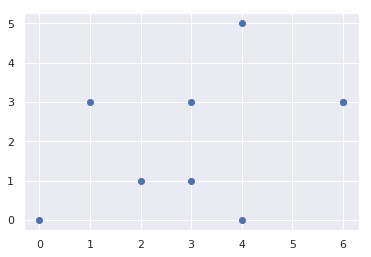

In [4]:
plot(points)

### GRAHAM-SCAN

In [5]:
# selecciono el punto con la menor coordenada y, en caso de empate, el de menor coordenada x
min_point = None
for i,(x,y) in enumerate(points):
  if(min_point == None or y < min_point[1]):
    min_point = (x,y)
  if(y == min_point[1] and x < min_point[0]):
    min_point = (x,y)
print(min_point)

(0, 0)


In [6]:
# ordeno según su ángulo
sorted_points = sorted(points, key=lambda x: sort_by_angle(min_point, x))
sorted_points.remove(min_point)
print(sorted_points)

[(4, 0), (3, 1), (6, 3), (2, 1), (6, 3), (3, 3), (4, 5), (1, 3)]


In [7]:
# el punto mínimo y el de menor ángulo tienen que pertenecer a la envoltura convexa
hull = [min_point, sorted_points[0]]

[(3, 1)]


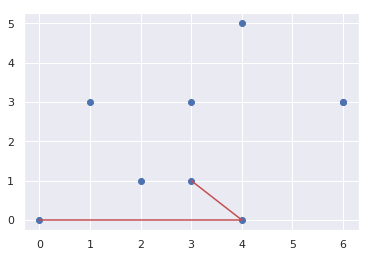

[(6, 3)]


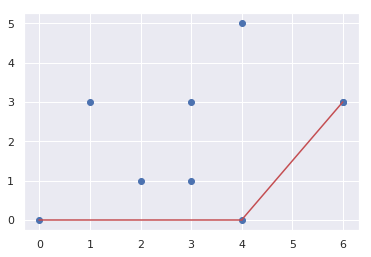

[(2, 1)]


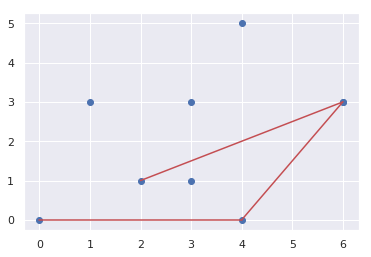

[(6, 3)]


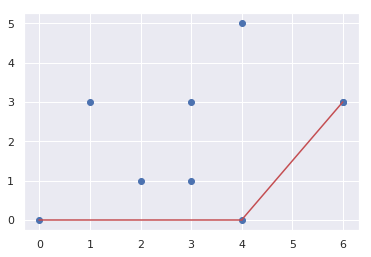

[(3, 3)]


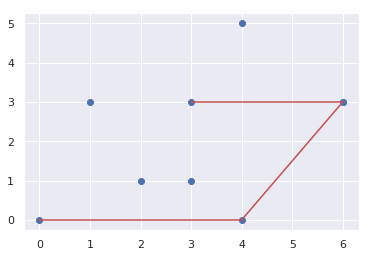

[(4, 5)]


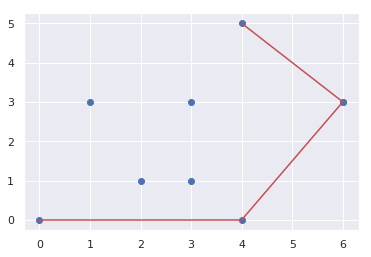

[(1, 3)]


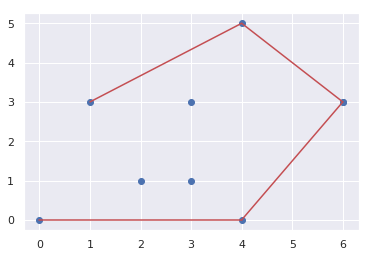

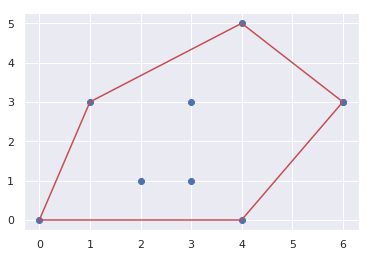

[(0, 0), (4, 0), (6, 3), (4, 5), (1, 3)]

In [8]:
# por cada uno de los siguientes puntos ordenados, calculo si giro a derecha o izquierda
# - si giro a izquierda, agrego el nuevo punto a la envoltura convexa
# - mientras gire a derecha, remuevo el último punto de la envoltura convexa
for point in sorted_points[1:]:
  print(f'[{point}]')
  while(det(hull[-2], hull[-1], point) <= 0):
    del hull[-1]
  hull.append(point)
  plot(points, hull)
plot(points, hull, True)
hull